In [ ]:
import pandas as pd

import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

pd.set_option('display.max_rows', 10)

# Lectura de datos

In [260]:
df_entrenamiento = pd.read_excel('/content/udemy_entrenamiento.xlsx', index_col="id", parse_dates=['created_date'])
df_entrenamiento['bestseller'] = df_entrenamiento['bestseller'].map({'yes': 'si', 'no': 'no'})
df_entrenamiento.head()

,title,headline,is_practice_test_course,bestseller,captions,rating,num_published_lectures,num_published_practice_tests,locale,created_date,instructional_level_simple,published_date,last_update_date,content_info_short,instructors,category,subcategory,objectives,list_price,discount_price
id,,,,,,,,,,,,,,,,,,,,
1,Aprende a tocar Piano o Teclado (Desde nivel b...,Curso completo de Piano con TEORÍA para el fun...,False,no,es_LA,4.535809,58,1,es_LA,2012-01-26,Todos los niveles,2012-01-26,2021-05-19,4 horas,121211,Música,Piano,Aprende Piano desde nivel básico. Estudiaras l...,$34.99,$12
2,Curso Hipoterapia y Rehabilitacion Ecuestre On...,"Terapias asistidas por Caballos (Hipoterapia, ...",False,no,es_ES,4.133590,32,0,es_ES,2012-06-10,Principiante,2012-06-10,2015-12-17,10 horas,236127,Estilo de vida,Adiestramiento de mascotas,La Hipoterapia y la Psicología.La Hipoterapia ...,$99.99,NaN
3,Curso SEO Online,Curso SEO práctico. Aprenda a posicionar su si...,False,no,es_ES,3.841912,76,0,es_ES,2011-06-13,Todos los niveles,2012-07-03,2020-02-28,"6,5 horas",3851,Marketing,SEO,Entender los fundamentos del SEO.Aprender a ha...,$94.99,$12
4,Aprende CSS3 sin dolor,"Realiza animaciones asombrosas, antes imposibl...",False,no,es_MX,4.039739,68,0,es_MX,2012-08-30,Intermedio,2012-08-31,2019-09-08,"9,5 horas",171706,Desarrollo,CSS,El alumno conocerá las principales característ...,$19.99,$12
5,"Aprende Javascript, HTML5 y CSS3",Aprende los principales lenguajes que dominan ...,False,si,NaN,4.643154,550,0,es_MX,2012-08-30,Todos los niveles,2012-09-02,2021-03-04,"70,5 horas",171706,Desarrollo,JavaScript,"Desarrollar páginas dinámicas con JavaScript, ...",$29.99,$12


In [261]:
df_entrenamiento.info()

df_entrenamiento

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11087 entries, 1 to 11087
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   title                         11087 non-null  object        
 1   headline                      11086 non-null  object        
 2   is_practice_test_course       11087 non-null  bool          
 3   bestseller                    11087 non-null  object        
 4   captions                      9142 non-null   object        
 5   rating                        11087 non-null  float64       
 6   num_published_lectures        11087 non-null  int64         
 7   num_published_practice_tests  11087 non-null  int64         
 8   locale                        11087 non-null  object        
 9   created_date                  11087 non-null  datetime64[ns]
 10  instructional_level_simple    11082 non-null  object        
 11  published_date              

,title,headline,is_practice_test_course,bestseller,captions,rating,num_published_lectures,num_published_practice_tests,locale,created_date,instructional_level_simple,published_date,last_update_date,content_info_short,instructors,category,subcategory,objectives,list_price,discount_price
id,,,,,,,,,,,,,,,,,,,,
1,Aprende a tocar Piano o Teclado (Desde nivel b...,Curso completo de Piano con TEORÍA para el fun...,False,no,es_LA,4.535809,58,1,es_LA,2012-01-26,Todos los niveles,2012-01-26,2021-05-19,4 horas,121211,Música,Piano,Aprende Piano desde nivel básico. Estudiaras l...,$34.99,$12
2,Curso Hipoterapia y Rehabilitacion Ecuestre On...,"Terapias asistidas por Caballos (Hipoterapia, ...",False,no,es_ES,4.133590,32,0,es_ES,2012-06-10,Principiante,2012-06-10,2015-12-17,10 horas,236127,Estilo de vida,Adiestramiento de mascotas,La Hipoterapia y la Psicología.La Hipoterapia ...,$99.99,NaN
3,Curso SEO Online,Curso SEO práctico. Aprenda a posicionar su si...,False,no,es_ES,3.841912,76,0,es_ES,2011-06-13,Todos los niveles,2012-07-03,2020-02-28,"6,5 horas",3851,Marketing,SEO,Entender los fundamentos del SEO.Aprender a ha...,$94.99,$12
4,Aprende CSS3 sin dolor,"Realiza animaciones asombrosas, antes imposibl...",False,no,es_MX,4.039739,68,0,es_MX,2012-08-30,Intermedio,2012-08-31,2019-09-08,"9,5 horas",171706,Desarrollo,CSS,El alumno conocerá las principales característ...,$19.99,$12
5,"Aprende Javascript, HTML5 y CSS3",Aprende los principales lenguajes que dominan ...,False,si,NaN,4.643154,550,0,es_MX,2012-08-30,Todos los niveles,2012-09-02,2021-03-04,"70,5 horas",171706,Desarrollo,JavaScript,"Desarrollar páginas dinámicas con JavaScript, ...",$29.99,$12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11083,Programación Asíncrona con Combine,"Domina la programación asíncrona, la red y el ...",False,no,es_ES,4.889103,32,0,es_ES,2020-04-17,Intermedio,2021-06-13,2021-06-09,"7,5 horas",34345906,Desarrollo,Desarrollo en iOS,Usar la librería asíncrona declarativa Combine...,$34.99,NaN
11084,Kali Linux: Hacking Ético desde 0 hasta Avanz...,¡Conviértete en experto usando Kali Linux! - S...,False,no,es_ES,5.000000,44,0,es_ES,2021-02-22,Todos los niveles,2021-06-14,2021-06-18,"13,5 horas",30827852,Informática y software,Kali Linux,Conocer de las capacidades que Kali Linux en P...,$24.99,$12
11085,Curso de HTML5 desde cero: El más completo en ...,Aprende HTML 5 y crea tus primeras páginas web...,False,no,es_ES,4.696703,40,0,es_ES,2019-09-05,Todos los niveles,2021-06-15,2021-06-15,4 horas,16661812,Desarrollo,HTML5,Dominar HTML.Dominar HTML5.Crear páginas web d...,$49.99,$12


In [262]:
#cat = df_entrenamiento['subcategory'].value_counts()
#for c in cat.index:
    #df_entrenamiento.loc[df_entrenamiento['subcategory'] == c, 'mr_ceci'] = cat[c]


In [263]:
#df_entrenamiento[['subcategory', 'mr_ceci']].head()

In [264]:
#df_entrenamiento['content_info_short'].str.split(" ").str[1]

In [265]:
df_prueba = pd.read_excel('/content/udemy_prueba.xlsx', index_col="id")
df_prueba.head()

,title,headline,is_practice_test_course,bestseller,captions,rating,num_published_lectures,num_published_practice_tests,locale,created_date,instructional_level_simple,published_date,last_update_date,content_info_short,instructors,category,subcategory,objectives,list_price,discount_price
id,,,,,,,,,,,,,,,,,,,,
11088,Desarrolla Juegos 2D en Unity hasta publicarlo...,Juegos 2d todo lo necesario para crear un jueg...,False,NaN,es_ES,5.000000,21,0,es_ES,2021-03-01,Principiante,2021-03-21,2021-03-04,4 horas,116249520,Informática y software,Desarrollo de juegos para móviles,Aprenderás todos los conceptos básicos para u...,$19.99,$12
11089,React Native: Aplicaciones nativas para IOS y ...,"TypeScript, React Native CLI, Google y Apple m...",False,NaN,es_LA,4.878622,380,0,es_LA,2021-03-01,Todos los niveles,2021-04-04,2021-06-14,"43,5 horas",11767934,Desarrollo,API de Google Maps,React Native.Crear aplicaciones móviles nativa...,$89.99,$12
11090,Introducción a Internet de las cosas con Micro...,Aprende como ingresar al mundo del Internet de...,False,NaN,es_ES,4.451706,32,0,es_ES,2021-03-01,Principiante,2021-04-06,2021-05-27,"1,5 horas",136827143,Informática y software,MicroPython,Controlar módulos ESP32 usando el lenguaje de ...,$34.99,$12
11091,Identifica y construye a tu cliente ideal,Construir las bases sólidas del perfil de clie...,False,NaN,es_ES,5.000000,31,0,es_ES,2021-03-01,Principiante,2021-04-09,NaN,4 horas,135011368,Negocios,Personas,¿Alguna vez te has preguntado cómo empresas co...,$59.99,$12
11092,Análisis de Procesos para líderes y jefes de p...,"(Procesos, Decisiones y Costos con Teoría de R...",False,NaN,"es_MX,en_US",4.672697,15,0,es_MX,2021-03-01,Principiante,2021-04-14,2021-05-04,1 hora,34396906,Negocios,Gestión de operaciones,Analizar a fondo Procesos y Operaciones.Defini...,$24.99,NaN


In [266]:
df_prueba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 11088 to 11326
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         239 non-null    object 
 1   headline                      239 non-null    object 
 2   is_practice_test_course       239 non-null    bool   
 3   bestseller                    0 non-null      float64
 4   captions                      188 non-null    object 
 5   rating                        239 non-null    float64
 6   num_published_lectures        239 non-null    int64  
 7   num_published_practice_tests  239 non-null    int64  
 8   locale                        239 non-null    object 
 9   created_date                  239 non-null    object 
 10  instructional_level_simple    239 non-null    object 
 11  published_date                239 non-null    object 
 12  last_update_date              228 non-null    object 
 13 

In [267]:
df = pd.concat([df_entrenamiento, df_prueba], axis=0)
df.shape

(11326, 20)

# Entendimiento (magia parte 1 -- AID)

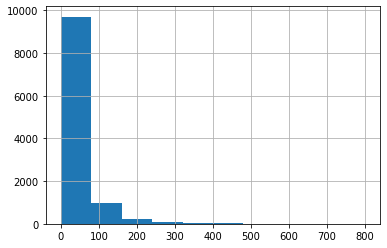

In [268]:

df_entrenamiento['num_published_lectures'].hist();


0    10538
1      237
2      198
6       45
4       27
5       25
3       17
Name: num_published_practice_tests, dtype: int64

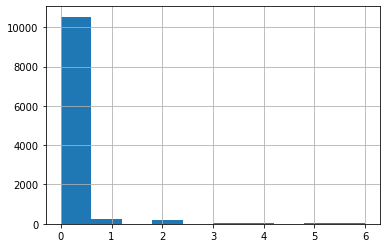

In [269]:
df_entrenamiento['num_published_practice_tests'].hist();
df_entrenamiento['num_published_practice_tests'].value_counts()

In [270]:
df_entrenamiento['discount_price'].value_counts()

$12    8787
$13     810
$16     207
$14     152
$17      52
       ... 
$19      24
$23       5
$21       3
$22       2
$20       1
Name: discount_price, Length: 12, dtype: int64

In [271]:
df['last_update_date'].value_counts()

2021-06-02    94
2021-06-01    64
2021-06-15    41
2021-01-25    34
2020-11-21    32
              ..
2016-09-01     1
2016-08-24     1
2017-01-09     1
2016-09-27     1
2020-12-18     1
Name: last_update_date, Length: 1916, dtype: int64

In [272]:
df_entrenamiento.corr()

,is_practice_test_course,rating,num_published_lectures,num_published_practice_tests
is_practice_test_course,1.000000,-0.067705,-0.101295,0.820798
rating,-0.067705,1.000000,0.102981,-0.042436
num_published_lectures,-0.101295,0.102981,1.000000,-0.071914
num_published_practice_tests,0.820798,-0.042436,-0.071914,1.000000


In [273]:
df_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11087 entries, 1 to 11087
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   title                         11087 non-null  object        
 1   headline                      11086 non-null  object        
 2   is_practice_test_course       11087 non-null  bool          
 3   bestseller                    11087 non-null  object        
 4   captions                      9142 non-null   object        
 5   rating                        11087 non-null  float64       
 6   num_published_lectures        11087 non-null  int64         
 7   num_published_practice_tests  11087 non-null  int64         
 8   locale                        11087 non-null  object        
 9   created_date                  11087 non-null  datetime64[ns]
 10  instructional_level_simple    11082 non-null  object        
 11  published_date              

# Limpieza (magia parte 2 -- MD)

## Ideas para alterar dataset


1.   Llevar el rating a categorías redondeando cada media estrella (10 categorías)
2.   Categorizar numero de lecturas a [0-25;25-50;50-75;75;+100]
3. Eliminar "$" de las filas de valores de precio y categorizar viendo histograma
4. No hay demasiados valores de discount. Llevar columna a booleano
5. Categorizar niveles por categorías [1,2,3,4]}
6. Extraer año de salida de "created_date"




## Pasos a seguir


1.   Concatenar datasets
2. Eliminar duplicados
3. Creación de columnas auxiliares
4. Definición de features
5. Separación de datasets por el 'None' en bestseller


### Dataset definitivo

In [274]:
# Concateno datasets

print('Entrenamiento tiene ',df_entrenamiento.shape[0], 'filas')
print('Prueba tiene ',df_prueba.shape[0], 'filas')

print('El dataset de prueba tiene ',df_prueba.duplicated().sum(),' duplicados!!!')
print('El dataset de entrenamiento tiene ',df_entrenamiento.duplicated().sum(),' duplicados')
print('Los duplicados de este dataset no deben dropearse. Dropeo unicamente todos los del de entrenamiento')

df_entrenamiento = df_entrenamiento.drop_duplicates()

df = pd.concat([df_entrenamiento,df_prueba])


print('Total tiene ',df.shape[0], 'filas')

# Identifico que se conserve la cantidad de duplicados que el dataset de prueba

print('Se identifican ',df.duplicated().sum(),' duplicados')






Entrenamiento tiene  11087 filas
Prueba tiene  239 filas
El dataset de prueba tiene  3  duplicados!!!
El dataset de entrenamiento tiene  53  duplicados
Los duplicados de este dataset no deben dropearse. Dropeo unicamente todos los del de entrenamiento
Total tiene  11273 filas
Se identifican  3  duplicados


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11273 entries, 1 to 11326
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         11273 non-null  object 
 1   headline                      11272 non-null  object 
 2   is_practice_test_course       11273 non-null  bool   
 3   bestseller                    11034 non-null  object 
 4   captions                      9287 non-null   object 
 5   rating                        11273 non-null  float64
 6   num_published_lectures        11273 non-null  int64  
 7   num_published_practice_tests  11273 non-null  int64  
 8   locale                        11273 non-null  object 
 9   created_date                  11273 non-null  object 
 10  instructional_level_simple    11268 non-null  object 
 11  published_date                11273 non-null  object 
 12  last_update_date              9991 non-null   object 
 13  c

In [276]:
# Llevo las fechas a datetime

df["created_date"] =  pd.to_datetime(df["created_date"], format="%Y-%m-%d")
df["published_date"] =  pd.to_datetime(df["published_date"], format="%Y-%m-%d")
df["last_update_date"] =  pd.to_datetime(df["last_update_date"], format="%Y-%m-%d")

df['año_creacion'] = pd.DatetimeIndex(df['created_date']).year
df['año_publicacion'] = pd.DatetimeIndex(df['published_date']).year
df['año_actualizado'] = pd.DatetimeIndex(df['last_update_date']).year

df['Se actualizó?'] = (df.año_publicacion != df.año_actualizado)


# Elimino signo pesos de la columna de precios y descuento

df['list_price'] = df['list_price'].str.replace('$','')
df['discount_price'] = df['discount_price'].str.replace('$','')

df['precio'] = pd.to_numeric(df['list_price'], downcast="float")
df['descuento'] = pd.to_numeric(df['discount_price'], downcast="float")

df.info()
df.head()

df['año_actualizado'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11273 entries, 1 to 11326
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   title                         11273 non-null  object        
 1   headline                      11272 non-null  object        
 2   is_practice_test_course       11273 non-null  bool          
 3   bestseller                    11034 non-null  object        
 4   captions                      9287 non-null   object        
 5   rating                        11273 non-null  float64       
 6   num_published_lectures        11273 non-null  int64         
 7   num_published_practice_tests  11273 non-null  int64         
 8   locale                        11273 non-null  object        
 9   created_date                  11273 non-null  datetime64[ns]
 10  instructional_level_simple    11268 non-null  object        
 11  published_date              

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


2020.0    3719
2021.0    2864
2019.0    1373
2018.0    1030
2017.0     398
2016.0     212
2015.0     191
2014.0     145
2013.0      56
2012.0       3
Name: año_actualizado, dtype: int64

### Creación de columnas auxiliares

#### 1. Redondear ratings

In [277]:
calificaciones =[0,0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
labels = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

df['new_rating'] = pd.cut(df['rating'], calificaciones, labels = labels)

df['new_rating'] = pd.to_numeric(df['new_rating'], downcast="float")

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11273 entries, 1 to 11326
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   title                         11273 non-null  object        
 1   headline                      11272 non-null  object        
 2   is_practice_test_course       11273 non-null  bool          
 3   bestseller                    11034 non-null  object        
 4   captions                      9287 non-null   object        
 5   rating                        11273 non-null  float64       
 6   num_published_lectures        11273 non-null  int64         
 7   num_published_practice_tests  11273 non-null  int64         
 8   locale                        11273 non-null  object        
 9   created_date                  11273 non-null  datetime64[ns]
 10  instructional_level_simple    11268 non-null  object        
 11  published_date              

#### 2. Categorizar número de lecturas del curso

In [278]:
lecturas =[0,25, 50, 75, 100, 10000]
labels_lecturas = ['0-25','25-50','50-75','75-100','+100']

df['nivel_lecturas'] = pd.cut(df['num_published_lectures'], lecturas, labels = labels_lecturas)
# Hago el mapeo porque RandomForest no ve strings

df['nivel_lecturas']  = df['nivel_lecturas'] .map({'0-25': 1, '25-50': 2,'50-75': 3, '75-100':4,'+100':5})
df['nivel_lecturas'] = pd.to_numeric(df['nivel_lecturas'], downcast="float")
df.head()


,title,headline,is_practice_test_course,bestseller,captions,rating,num_published_lectures,num_published_practice_tests,locale,created_date,...,list_price,discount_price,año_creacion,año_publicacion,año_actualizado,Se actualizó?,precio,descuento,new_rating,nivel_lecturas
id,,,,,,,,,,,,,,,,,,,,,
1,Aprende a tocar Piano o Teclado (Desde nivel b...,Curso completo de Piano con TEORÍA para el fun...,False,no,es_LA,4.535809,58,1,es_LA,2012-01-26,...,34.99,12,2012,2012,2021.0,True,34.990002,12.0,5.0,3.0
2,Curso Hipoterapia y Rehabilitacion Ecuestre On...,"Terapias asistidas por Caballos (Hipoterapia, ...",False,no,es_ES,4.133590,32,0,es_ES,2012-06-10,...,99.99,NaN,2012,2012,2015.0,True,99.989998,NaN,4.5,2.0
3,Curso SEO Online,Curso SEO práctico. Aprenda a posicionar su si...,False,no,es_ES,3.841912,76,0,es_ES,2011-06-13,...,94.99,12,2011,2012,2020.0,True,94.989998,12.0,4.0,4.0
4,Aprende CSS3 sin dolor,"Realiza animaciones asombrosas, antes imposibl...",False,no,es_MX,4.039739,68,0,es_MX,2012-08-30,...,19.99,12,2012,2012,2019.0,True,19.990000,12.0,4.5,3.0
5,"Aprende Javascript, HTML5 y CSS3",Aprende los principales lenguajes que dominan ...,False,si,NaN,4.643154,550,0,es_MX,2012-08-30,...,29.99,12,2012,2012,2021.0,True,29.990000,12.0,5.0,5.0


#### 3. Precio y descuentos

In [279]:
#Defino curso como barato si vale menos de 30 dolares

df['barato'] = df.precio <= 30

df['Tuvo descuento?'] = df.discount_price.notnull()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11273 entries, 1 to 11326
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   title                         11273 non-null  object        
 1   headline                      11272 non-null  object        
 2   is_practice_test_course       11273 non-null  bool          
 3   bestseller                    11034 non-null  object        
 4   captions                      9287 non-null   object        
 5   rating                        11273 non-null  float64       
 6   num_published_lectures        11273 non-null  int64         
 7   num_published_practice_tests  11273 non-null  int64         
 8   locale                        11273 non-null  object        
 9   created_date                  11273 non-null  datetime64[ns]
 10  instructional_level_simple    11268 non-null  object        
 11  published_date              

#### 4. Categorizacion por niveles

In [280]:
df['instructional_level_simple'].value_counts()

df['instructional_dummy'] = df['instructional_level_simple'].map({'Todos los niveles': 4, 'Principiante': 1,'Intermedio': 1,'Experto': 1})

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11273 entries, 1 to 11326
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   title                         11273 non-null  object        
 1   headline                      11272 non-null  object        
 2   is_practice_test_course       11273 non-null  bool          
 3   bestseller                    11034 non-null  object        
 4   captions                      9287 non-null   object        
 5   rating                        11273 non-null  float64       
 6   num_published_lectures        11273 non-null  int64         
 7   num_published_practice_tests  11273 non-null  int64         
 8   locale                        11273 non-null  object        
 9   created_date                  11273 non-null  datetime64[ns]
 10  instructional_level_simple    11268 non-null  object        
 11  published_date              

In [281]:
#Seleccion de columnas
#cols_originales =['is_practice_test_course', 'rating', 'num_published_lectures', 'num_published_practice_tests', 'bestseller']

columnas = ['is_practice_test_course', 'precio', 'nivel_lecturas','bestseller','new_rating','num_published_practice_tests','barato','Tuvo descuento?','instructional_dummy','Se actualizó?']
subset_drop = ['is_practice_test_course', 'precio', 'nivel_lecturas','new_rating','num_published_practice_tests','barato','Tuvo descuento?','instructional_dummy','Se actualizó?']
df = df[columnas]

# Filtrado del dataset para extraer el df_prueba con la dimension original

mask_bestseller = df['bestseller'].isna()
mask_entrenamiento = df['bestseller'].notnull()

df_prueba = df[mask_bestseller]
df_entrenamiento = df[mask_entrenamiento]

print('Entrenamiento tiene ',df_entrenamiento.shape[0], 'filas')
print('Prueba tiene ',df_prueba.shape[0], 'filas')

#Defino funcion para darnos un preview de valores que faltan del dataframe

def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

#missing_values_table(df_entrenamiento)

# Dropeo del entrenamiento los NaN

missing_values_table(df_prueba)

# Dropeo del de prueba los Nan

df_prueba = df_prueba.dropna(subset= subset_drop)

df_entrenamiento = df_entrenamiento.dropna(subset= subset_drop)
missing_values_table(df_entrenamiento)

Entrenamiento tiene  11034 filas
Prueba tiene  239 filas
Your selected dataframe has 10 columns.
There are 3 columns that have missing values.
Your selected dataframe has 10 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# Territorio de Aprendizaje Automático
Se mira y no se toca

In [282]:
# Datos para probar
X = df_entrenamiento[df_entrenamiento.columns.drop('bestseller')]
y = df_entrenamiento['bestseller']

# Partimos en entrenamiento y prueba 
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Creamos el objeto del modelo
clf = sk.ensemble.RandomForestClassifier(n_estimators=3000, criterion='gini', max_depth=5, n_jobs=-1, random_state=42)

# Entrenamos el modelo
clf.fit(X_train, y_train)

# Predecimos
y_pred = clf.predict(X_test)

# Medimos la performance de la predicción
sk.metrics.accuracy_score(y_test, y_pred)

0.8205719557195572

In [283]:
# Datos a predecir 
X_prueba = df_prueba[df_prueba.columns.drop('bestseller')]

# Entrenamos el modelo con todos los datos
clf.fit(X, y)

# Predecimos
df_prueba['bestseller'] = clf.predict(X_prueba)

# Grabamos
df_prueba['bestseller'].to_csv('/content/solucion.csv')